In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Some analytics of data

In [19]:
df = pd.read_csv(r'C:\Users\eskil\PycharmProjects\tdt4173\Data\billboard-hits-flops-weeks.csv', sep = ",")

Text(0.5, 0, 'Non hits and hits')

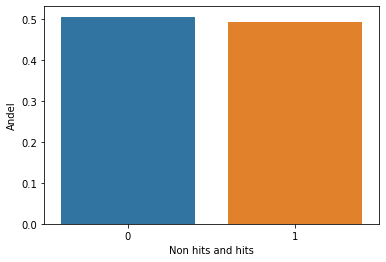

In [4]:
#Plot fordeling av hit/ikke-hit
hit_perc = df['target'].value_counts()/len(df)
sns.barplot(x=hit_perc.index, y=hit_perc.values)
plt.ylabel("Andel")
plt.xlabel("Non hits and hits")

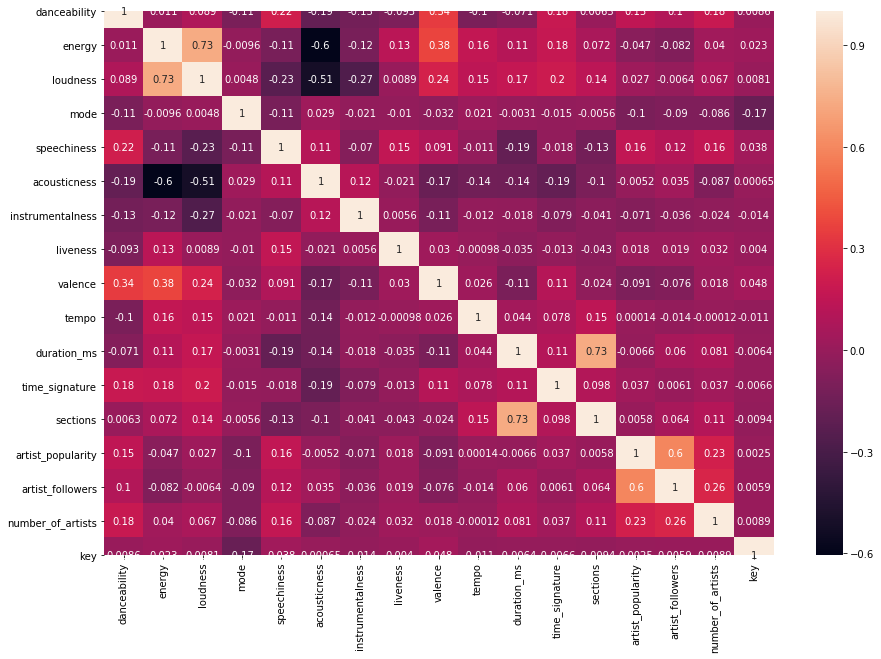

In [5]:
#Heatmap for å se korrelasjon mellom variable seg imellom
correlation = df.corr()
heatmap = correlation.drop(labels = ["target", "popularity", "weeks"], axis = 0)
heatmap = heatmap.drop(labels = ["target", "popularity", "weeks"], axis = 1)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(heatmap, ax = ax, annot = True)

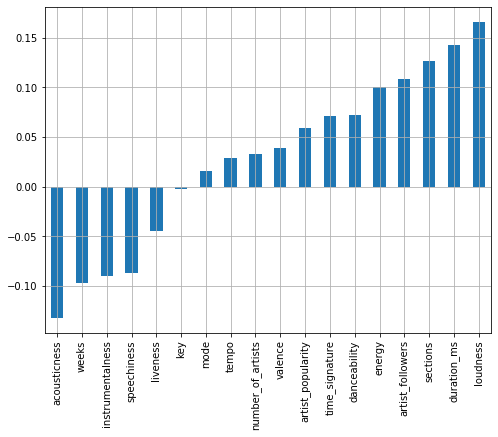

In [6]:
target_corr = correlation['target']
target_corr = target_corr.drop(labels = ['target', 'popularity'])
target_corr = target_corr.sort_values()
target_corr.plot(grid = True, figsize = (8,6), kind = 'bar')

In [14]:
print(pd.pivot_table(training90s, index = 'target', columns = 'key', values = 'tempo', aggfunc ='count'))

key      0    1    2    3    4    5    6    7    8    9    10   11
target                                                            
0       362  193  337  123  222  255  138  362  135  319  158  156
1       284  298  226   71  201  234  235  347  178  244  214  228


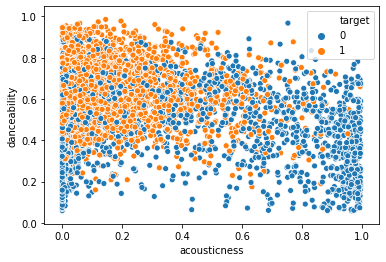

In [40]:
training90s.head()
sns.scatterplot(x='acousticness',y='danceability', data =training90s, hue='target')
sns.scatterplot(x='acousticness',y='danceability', data =training90s, hue='target')
#sns.scatterplot(x='',y='danceability', data =training90s,hue='target')
#sns.scatterplot(x='tempo',y='danceability', data =training90s,hue='target')

In [62]:
#acoustic_mean_hit = df.loc[df['target'] == 0].acousticness.mean()
#print(acoustic_mean_hit)
#acoustic_mean_hit = df.loc[df['target'] == 1].acousticness.mean()
#print(acoustic_mean_hit)
df.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,sections,target,popularity,weeks,artist_popularity,artist_followers,number_of_artists,key
count,12469.000000,12469.000000,12469.000000,12469.000000,12469.00000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,1.246900e+04,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,1.246900e+04,12469.000000,12469.000000
mean,0.631192,0.665250,-6.388272,0.644799,0.12611,0.200556,0.017510,0.190418,0.495067,121.900783,2.170977e+05,3.949555,9.630443,0.538696,49.765819,64.091266,77.983238,9.933513e+06,1.376454,5.222712
std,0.152133,0.184718,2.906212,0.478593,0.14220,0.243060,0.102529,0.147928,0.224260,30.301409,5.684833e+04,0.371126,2.799140,0.498520,21.148994,142.728277,15.532732,1.411906e+07,0.774914,3.596024
min,0.000000,0.000284,-38.370000,0.000000,0.00000,0.000002,0.000000,0.000000,0.000000,0.000000,5.920000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,0.530000,0.547000,-7.480000,0.000000,0.03760,0.022200,0.000000,0.097900,0.322000,96.980000,1.891490e+05,4.000000,8.000000,0.000000,37.000000,0.000000,70.000000,1.141053e+06,1.000000,2.000000
50%,0.636000,0.686000,-5.855000,1.000000,0.06140,0.095700,0.000000,0.131000,0.490000,121.029000,2.151600e+05,4.000000,10.000000,1.000000,55.000000,0.000000,81.000000,4.188345e+06,1.000000,5.000000
75%,0.740000,0.808000,-4.579000,1.000000,0.16600,0.291000,0.000030,0.243000,0.668000,143.078000,2.430130e+05,4.000000,11.000000,1.000000,65.000000,59.000000,90.000000,1.268643e+07,2.000000,8.000000
max,0.986000,1.000000,0.221000,1.000000,0.96600,0.996000,0.998000,0.993000,0.977000,217.880000,1.247294e+06,5.000000,62.000000,1.000000,100.000000,1136.000000,100.000000,1.172432e+08,22.000000,11.000000


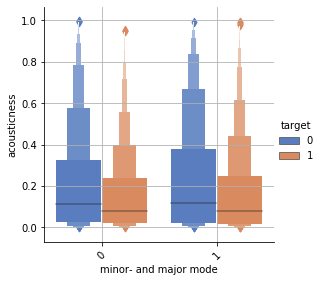

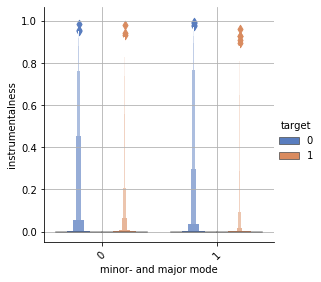

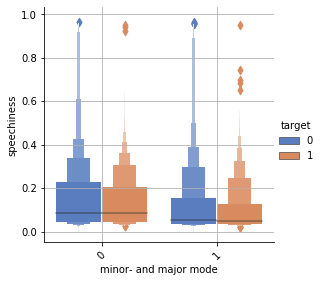

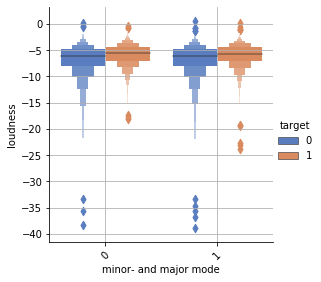

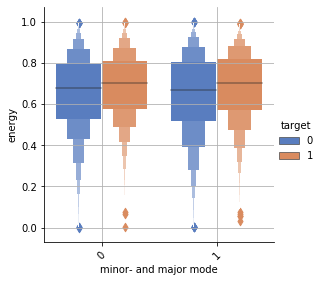

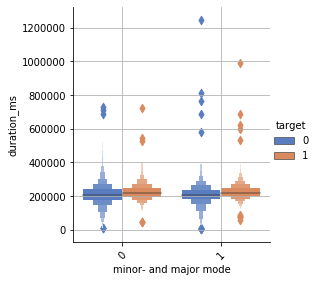

In [10]:
chart = sns.catplot(x = "mode", y="acousticness", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="instrumentalness", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="speechiness", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="loudness", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="energy", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="duration_ms", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);



## Some further feature engineering

In [2]:
df = pd.read_csv(r'C:\Users\eskil\PycharmProjects\tdt4173\Data\new_df.csv', sep = ",")

#make balances dataset
flops = df.loc[df['target'] == 0]
diff = len(df.loc[df['target'] == 0]) - len(df.loc[df['target'] == 1])
sampled = flops.sample(n = diff)
df = df.drop(sampled.index)

#convert releasedate to datetime, and add year as a feature
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')
df['release_date'] = df['release_date'].dt.year

df.isnull() #No null values

#drop features we dont want or need. This includes: String-values, correlated values and values we dont need () --> No need for one hot encoding as key is removed.
final_data = df.drop(["artist", "song_id", "list_of_artists", "chart_date", "popularity", "name", "lead_artist_name", "artist_id", "list_of_artists", "key"], axis = 1)
train_data, test_data = train_test_split(final_data, test_size = 0.2, random_state = 4)

In [3]:
final_data.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,time_signature,sections,target,release_date,weeks,artist_popularity,artist_followers,number_of_artists,release_year,chart_year
0,0.291,0.735,-4.767,1,0.0415,0.000374,0.000005,0.0808,0.190,175.978,...,4,10,1,2000,22,61,521251,1,2000,2001.0
1,0.506,0.951,-4.305,0,0.0796,0.010900,0.000072,0.0536,0.748,199.811,...,4,13,1,2000,98,79,5595153,1,2000,2001.0
2,0.698,0.435,-6.876,1,0.0445,0.089700,0.000000,0.2750,0.208,119.988,...,4,13,1,2000,6,71,1927560,1,2000,2000.0
3,0.707,0.923,-3.957,1,0.0521,0.128000,0.000437,0.2730,0.842,108.049,...,4,9,1,2000,109,83,7974170,1,2000,2000.0
4,0.543,0.790,-6.145,1,0.0491,0.051300,0.000004,0.0981,0.655,123.631,...,4,9,1,2000,0,61,285844,1,2000,2000.0


In [4]:
train_data.to_csv("train_data2")
test_data.to_csv("test_data2")